# Exploratory Data Analysis & Visualisation - EV North American Charging Stations

### Importing Libraries & Uploading Dataset

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from matplotlib import rcParams
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('Electric and Alternative Fuel Charging Stations.csv')

### Inspecting & Filtering Out Missing Values

In [2]:
print('Null Values per Attribute: \n')
with pd.option_context('display.max_rows', None,):
#    print(df.nunique())
    print(df.isnull().sum())

Null Values per Attribute: 

Fuel Type Code                          0
Station Name                            0
Street Address                          1
Intersection Directions             65913
City                                    0
State                                   0
ZIP                                     1
Plus4                               70406
Station Phone                        5202
Status Code                             0
Expected Date                       69188
Groups With Access Code                 0
Access Days Time                     3778
Cards Accepted                      59117
BD Blends                           69189
NG Fill Type Code                   68803
NG PSI                              68809
EV Level1 EVSE Num                  70120
EV Level2 EVSE Num                  16262
EV DC Fast Count                    62099
EV Other Info                       70357
EV Network                           9499
EV Network Web                      20101
Geoco

In [3]:
# Drop NA values by Row
DF_no_NaN_row = df.dropna(axis=0)
DF_no_NaN_column = df.dropna(axis=1)
print('The shape of original dataframe is: ' + str(df.shape))
print('Shape after dropping null values by row: ' + str(DF_no_NaN_row.shape))
print('Shape after dropping null values by column: ' + str(DF_no_NaN_column.shape))

# Every row has at least one null value from the analysis. However, only 13 columns have no null values. 
# Therefore most of the 
print('Percentage of columns missing values: ' + str(13/65*100) + '%')
# Let's see what those columns are. 
print('\nColumns with no missing values: \n' +
      str(DF_no_NaN_column.columns.values))

The shape of original dataframe is: (70406, 65)
Shape after dropping null values by row: (0, 65)
Shape after dropping null values by column: (70406, 13)
Percentage of columns missing values: 20.0%

Columns with no missing values: 
['Fuel Type Code' 'Station Name' 'City' 'State' 'Status Code'
 'Groups With Access Code' 'Latitude' 'Longitude' 'ID' 'Updated At'
 'Country' 'Groups With Access Code (French)' 'Access Code']


In [4]:
# Select relevant attributes with no null values
df1 = DF_no_NaN_column[['Fuel Type Code', 'City', 'State', 'Status Code', 'Groups With Access Code', 'Country', 'Access Code']]
print('Null values for selected columns: \n' + str(df1.isnull().sum()))
print('\nHead of New Dataframe:')
df1.head()


Null values for selected columns: 
Fuel Type Code             0
City                       0
State                      0
Status Code                0
Groups With Access Code    0
Country                    0
Access Code                0
dtype: int64

Head of New Dataframe:


,Fuel Type Code,City,State,Status Code,Groups With Access Code,Country,Access Code
0,CNG,Montgomery,AL,E,Private,US,private
1,CNG,Atlanta,GA,E,Public - Card key at all times,US,public
2,CNG,Atlanta,GA,E,Private - Government only,US,private
3,CNG,Atlanta,GA,E,Private,US,private
4,CNG,Fort Smith,AR,E,Public - Credit card at all times,US,public


### Fuel Type Code - Exploration

In [5]:
# Unique values per column - Fuel Type Codes
print('\n' + 'Fuel Type Codes by Count:')
with pd.option_context('display.max_rows', None,):
    print(df1['Fuel Type Code'].value_counts())


Fuel Type Codes by Count:
ELEC    60907
E85      4508
LPG      1867
CNG      1631
BD       1218
LNG       158
HY        117
Name: Fuel Type Code, dtype: int64


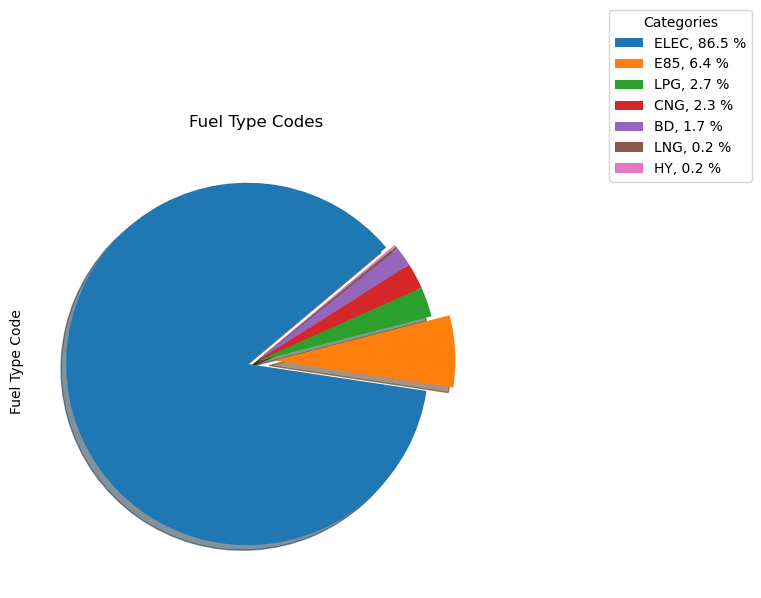

In [6]:
# Selecting the Data and customising the figure 
fig = plt.figure(figsize=(6,6), dpi=100)
fuel_type_code = df1['Fuel Type Code'].value_counts()
status_type = ['ELEC', 'E85', 'LPG', 'CNG', 'BD', 'LNG', 'HY']

# Setting up the Pie Chart
ax = fuel_type_code.plot(kind="pie", shadow=True, explode=(0.05,0.1,0,0,0,0,0),
               legend=True, title='Fuel Type Codes', labels=status_type, labeldistance=None, startangle=40)

# Calculating Percentages
percents = fuel_type_code.to_numpy() * 100 / fuel_type_code.to_numpy().sum()

# Setting up the Legend Values
legend = ['%s, %1.1f %%' % (idx, value) for idx, value in zip(fuel_type_code.index, percents)]
plt.legend(legend, title="Categories", bbox_to_anchor=(1.35,1.1), loc="upper right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure,
          )
# Saving the plot
plt.savefig('pie_chart.png')

In [7]:
# Unique values per column
print('\n' + 'Value Counts Per Attribute:')
with pd.option_context('display.max_rows', None,):
    print('\nTop 10 North American Cities by Charging Stations')
    print(df1['City'].value_counts().head(10))
              
#     print('\nCity')
#     print(df1['City'].value_counts())
#     print('\nHello')
#     print(df1['Fuel Type Code'].value_counts())

# print('\n' + 'Unique Values - Fuel Type Code')
# with pd.option_context('display.max_rows', None,):
#     print(DF_no_NaN_column['Fuel Type Code'].value_counts())
    
# print('\n' + 'Unique Values - Status Code')
# with pd.option_context('display.max_rows', None,):
#     print(DF_no_NaN_column['Status Code'].value_counts())


Value Counts Per Attribute:

Top 10 North American Cities by Charging Stations
Los Angeles      1586
San Diego         918
Montréal          635
Atlanta           608
San Jose          587
Irvine            580
Austin            579
Kansas City       463
San Francisco     453
Seattle           429
Name: City, dtype: int64


# Creating Pie Chart for Fuel Type Code

## Groups with Access Code

Sorting Data

In [8]:
df1_sorted = df1.sort_values(by=('Groups With Access Code'), ascending=[False])
df1_sorted

,Fuel Type Code,City,State,Status Code,Groups With Access Code,Country,Access Code
6572,E85,Oak Park,MI,T,TEMPORARILY UNAVAILABLE (Public),US,public
12362,ELEC,Toronto,ON,T,TEMPORARILY UNAVAILABLE (Public),CA,public
56459,ELEC,Boston,MA,T,TEMPORARILY UNAVAILABLE (Public),US,public
4899,ELEC,Honolulu,HI,T,TEMPORARILY UNAVAILABLE (Public),US,public
4888,E85,Allentown,PA,T,TEMPORARILY UNAVAILABLE (Public),US,public
...,...,...,...,...,...,...,...
64048,ELEC,Chicoutimi,QC,P,PLANNED - not yet accessible (Private),CA,private
64047,ELEC,Sherbrooke,QC,P,PLANNED - not yet accessible (Private),CA,private
64046,ELEC,St-Hubert,QC,P,PLANNED - not yet accessible (Private),CA,private
64075,ELEC,Woodbridge,ON,P,PLANNED - not yet accessible (Private),CA,private
